In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib  
from matplotlib import pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
import string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from keras.layers import LSTM,Dropout
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.3 MB/s eta 0:00:00


## 1. Analisis exploratorio de datos

Este proyecto consta de un analisis de sentiomiento para reviews de peliculas, como se puede observar se carga primeramente el dataset de Drive y el cual contiene la reseña de la película y el indicador del sentimiento en 1 y 0 (positivo o negativo)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv(r"/content/drive/My Drive/movie_data.csv")
data.head(25)


Mounted at /content/drive


,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
5,Leave it to Braik to put on a good show. Final...,1
6,Nathan Detroit (Frank Sinatra) is the manager ...,1
7,"To understand ""Crash Course"" in the right cont...",1
8,I've been impressed with Chavez's stance again...,1
9,This movie is directed by Renny Harlin the fin...,1


 Mostramos las dimensiones de como está conformada la base de datos

In [ ]:
data.shape

(50000, 2)

In [ ]:
data.head()

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


Las operaciones que se están realizando son las siguientes:

"count_sent": Se está contando la cantidad de oraciones en cada texto utilizando una expresión regular para buscar los caracteres "/n" y sumándole 1 al resultado. Esto se almacena en una nueva columna llamada "count_sent".

"count_word": Se está contando la cantidad de palabras en cada texto utilizando el método split() y len(). Esto se almacena en una nueva columna llamada "count_word".

"count_unique_word": Se está contando la cantidad de palabras únicas en cada texto utilizando el método split() y set(). Esto se almacena en una nueva columna llamada "count_unique_word".

"count_letters": Se está contando la cantidad de letras en cada texto utilizando len(). Esto se almacena en una nueva columna llamada "count_letters".

"count_punctuations": Se está contando la cantidad de signos de puntuación en cada texto utilizando una lista de signos de puntuación y una lista por comprensión. Esto se almacena en una nueva columna llamada "count_punctuations".

"count_words_upper": Se está contando la cantidad de palabras en mayúscula en cada texto utilizando el método split() y isupper(). Esto se almacena en una nueva columna llamada "count_words_upper".

"count_words_title": Se está contando la cantidad de palabras con la primera letra en mayúscula en cada texto utilizando el método split() y istitle(). Esto se almacena en una nueva columna llamada "count_words_title".

"count_stopwords": Se está contando la cantidad de palabras que son stopwords (palabras comunes y no informativas) en cada texto utilizando una lista de stopwords y una lista por comprensión. Esto se almacena en una nueva columna llamada "count_stopwords".

"mean_word_len": Se está calculando la longitud promedio de las palabras en cada texto utilizando el método split(), len() y np.mean(). Esto se almacena en una nueva columna llamada "mean_word_len".

"word_unique_percent": Se está calculando el porcentaje de palabras únicas en relación con la cantidad total de palabras en cada texto. Esto se almacena en una nueva columna llamada "word_unique_percent".

"punct_percent": Se está calculando el porcentaje de signos de puntuación en relación con la cantidad total de palabras en cada texto. Esto se almacena en una nueva columna llamada "punct_percent".

Estos cálculos permiten tener una visión más detallada de las características del texto en cada fila del dataframe, lo que puede ser útil para el análisis posterior.

In [ ]:
import nltk
nltk.download('stopwords')
eng_stopwords = set(stopwords.words("english"))
#count of sentences
data['count_sent']=data["review"].apply(lambda x: len(re.findall("/n",str(x)))+1)
#Word count in each comment:
data['count_word']=data["review"].apply(lambda x: len(str(x).split()))
#Unique word count
data['count_unique_word']=data["review"].apply(lambda x: len(set(str(x).split())))
#Letter count
data['count_letters']=data["review"].apply(lambda x: len(str(x)))
#punctuation count
data["count_punctuations"] =data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#upper case words count
data["count_words_upper"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#title case words count
data["count_words_title"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#Number of stopwords
data["count_stopwords"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
#Average length of the words
data["mean_word_len"] = data["review"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
#Word count percent in each comment:
data['word_unique_percent']=data['count_unique_word']*100/data['count_word']
#Punct percent in each comment:
data['punct_percent']=data['count_punctuations']*100/data['count_word']
#derived features
#Word count percent in each comment:
data['word_unique_percent']=data['count_unique_word']*100/data['count_word']
#derived features
#Punct percent in each comment:
data['punct_percent']=data['count_punctuations']*100/data['count_word']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
## Reordenamos las columnas para el analisis en la tabla correspondiente 
data = data[['review', 'count_sent', 'count_word', 'count_unique_word',
       'count_letters', 'count_punctuations', 'count_words_upper',
       'count_words_title', 'count_stopwords', 'mean_word_len',
      'word_unique_percent', 'punct_percent','sentiment']]
data.head(15)

,review,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,word_unique_percent,punct_percent,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1,238,149,1393,52,3,42,108,4.857143,62.605042,21.848739,1
1,OK... so... I really like Kris Kristofferson a...,1,234,159,1257,62,10,21,106,4.376068,67.948718,26.495726,0
2,"***SPOILER*** Do not read this, if you think a...",1,291,195,1678,104,6,39,128,4.769759,67.010309,35.738832,0
3,hi for all the people who have seen this wonde...,1,81,57,381,3,1,0,43,3.716049,70.370370,3.703704,1
4,"I recently bought the DVD, forgetting just how...",1,118,83,698,42,5,14,49,4.923729,70.338983,35.593220,0
5,Leave it to Braik to put on a good show. Final...,1,157,104,740,15,5,27,89,3.719745,66.242038,9.554140,1
6,Nathan Detroit (Frank Sinatra) is the manager ...,1,284,216,1767,69,3,44,108,5.225352,76.056338,24.295775,1
7,"To understand ""Crash Course"" in the right cont...",1,119,102,698,42,3,23,45,4.873950,85.714286,35.294118,1
8,I've been impressed with Chavez's stance again...,1,116,86,708,15,3,11,53,5.112069,74.137931,12.931034,1
9,This movie is directed by Renny Harlin the fin...,1,128,91,769,38,0,30,44,5.015625,71.093750,29.687500,1


In [ ]:
data.groupby(['sentiment'],as_index=False).mean()

<ipython-input-9-4f775c7a50c0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['sentiment'],as_index=False).mean()


,sentiment,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,word_unique_percent,punct_percent
0,0,1.00224,229.46456,152.2662,1294.06436,53.59836,5.14632,24.72780,103.38132,4.623461,70.896372,23.447622
1,1,1.00196,232.84932,152.0156,1324.79768,51.55876,4.56928,27.96804,104.31900,4.657892,70.164729,22.077985


## 2. Ingeniería / selección de características + limpieza de datos (si es necesario)

Para este ´punto se aplica el siguiente proceso

Remover signos de puntuacion

Remover URL's 

Remover tags

Remover stopwords: Las palabras vacías son palabras que son tan comunes que los tokenizadores típicos básicamente las ignoran. De forma predeterminada, NLTK (Natural Language Toolkit) incluye una lista de 40 palabras vacías, que incluyen: "a", "an", "the", "of", "in", etc.

Remover contracciones de palabras

Lematizacion de las palabras: es una técnica de normalización de textos que busca reducir las palabras a su raíz (lema).




In [ ]:
# Removing all punctuations from Text
mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't":"shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

def clean_contractions(text, mapping):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

#removing stopwords and word processing

def word_replace(text):
    return text.replace('','')

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)
def preprocess(text):
    text=clean_contractions(text,mapping)
    text=text.lower()
    text=word_replace(text)
    text=remove_urls(text)
    text=remove_html(text)
    text=remove_stopwords(text)
    text=remove_punctuation(text)
#     text=stem_words(text) ## Takes too much of time
    text=lemmatize_words(text)
    return text
     

In [ ]:
#REPRESENTATION OF THE PROCESSED DATA IN TABULAR FORM
import nltk
nltk.download('wordnet')
data["reviews_p"] = data["review"].apply(lambda text: preprocess(text))
data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,review,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,word_unique_percent,punct_percent,sentiment,reviews_p
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1,238,149,1393,52,3,42,108,4.857143,62.605042,21.848739,1,1974 teenager martha moxley maggie grace move ...
1,OK... so... I really like Kris Kristofferson a...,1,234,159,1257,62,10,21,106,4.376068,67.948718,26.495726,0,ok so really like kris kristofferson usual eas...
2,"***SPOILER*** Do not read this, if you think a...",1,291,195,1678,104,6,39,128,4.769759,67.010309,35.738832,0,spoiler read this think watching movie althoug...
3,hi for all the people who have seen this wonde...,1,81,57,381,3,1,0,43,3.716049,70.370370,3.703704,1,hi people seen wonderful movie im sure thet wo...
4,"I recently bought the DVD, forgetting just how...",1,118,83,698,42,5,14,49,4.923729,70.338983,35.593220,0,recently bought dvd forgetting much hated movi...


2.1 Procesamiento del lenguaje Natural

Ahora utilizamos TextBlob el cual es una biblioteca de código abierto para el procesamiento de datos de texto, proporcionando una API simple para entrar en lenguaje natural común (NLP) las tareas de procesamiento.

In [ ]:
from textblob import TextBlob

def get_sentiment( tweet):
        analysis = TextBlob(tweet)
      
        if analysis.sentiment.polarity > 0:
            return 'positive'
        else:
            return 'negative'

data['TextBlob']=data['reviews_p'].apply(lambda x: get_sentiment(x))

print(data.TextBlob.value_counts())
print("\n",data.sentiment.value_counts())

positive    36960
negative    13040
Name: TextBlob, dtype: int64

 1    25000
0    25000
Name: sentiment, dtype: int64


 ## 2.2 Tecnica de incrustacion de palabras 
## 2.2.1 Vectorizacion de palabras

Primero vamos a iniicializar variables de test y de train para trabajar con nuestros datos, tomamos como valores los datos del dataset y lesignamos un porcentaje de prueba de 20%. Ademas particionamos los datos para repartirlos en las categorías ya mencionadas

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['reviews_p'], data['sentiment'], test_size=0.2,random_state=0)

In [ ]:
[i.shape for i in [X_train, X_test, y_train, y_test] ]

[(40000,), (10000,), (40000,), (10000,)]

En este punto utilizamos Tfidf vectorizer, una tecnica quetiene e n cuenta el número de veces que aparece la palabra (o token) en dicho documento, pero también el total de veces que aparece en todo el corpus.

Los tokens muy frecuentes a nivel de documento y de corpus (posibles stopwords) obtendrán un valor de TF-IDF Vectorizer bajo.
Los tokens que aparecen solo en ciertos documentos del corpus tendrán un IDF mayor que aquellos que aparecen en mayor número de documentos.

In [ ]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 3),
    max_features=10000
)

word_vectorizer.fit(data['reviews_p'])

tfidf_train = word_vectorizer.transform(X_train)
tfidf_test = word_vectorizer.transform(X_test)

In [ ]:
print('Shape of tfidf_train:',tfidf_train.shape)
print('Shape of tfidf_test:',tfidf_test.shape)
     

Shape of tfidf_train: (40000, 10000)
Shape of tfidf_test: (10000, 10000)


##### COUNT vectorizer #####

In [ ]:
cv=CountVectorizer(analyzer = 'word', token_pattern = r'\w{1,}',ngram_range=(1,3),max_features=10000)
cv.fit(data['reviews_p'])
cv_train=cv.transform(X_train)
cv_test=cv.transform(X_test)

In [ ]:
print('Shape of cv_train:',cv_train.shape)
print('Shape of cv_test:',cv_test.shape)

Shape of cv_train: (40000, 10000)
Shape of cv_test: (10000, 10000)


##### Algoritmo de deep learning (Convolutional neural network) #####
Este código se refiere a la construcción y entrenamiento de un modelo de aprendizaje profundo para clasificación de sentimientos en un conjunto de datos.

Aquí se utiliza la clase Tokenizer de Keras para convertir las reseñas de texto en secuencias de números enteros, que se pueden procesar con el modelo.

El parámetro num_words=5000 indica que se considerarán las 5000 palabras más frecuentes en las reseñas para la tokenización.
Luego, se dividen los datos en conjuntos de entrenamiento, validación y prueba, y se convierten las secuencias de texto en matrices de entrada numéricas de longitud fija utilizando pad_sequences de Keras.

Después de esto, se define la arquitectura del modelo, que consta de varias capas de convolución y pooling, seguidas de una capa densa con una función de activación sigmoide para la clasificación binaria.

La capa Embedding se utiliza para convertir las secuencias enteras en vectores de tamaño fijo.
Las capas Conv1D se utilizan para extraer características de las secuencias de texto.
Las capas MaxPooling1D se utilizan para reducir la dimensionalidad de las características extraídas.
La capa Dense se utiliza para clasificar las reseñas en positivas o negativas.
Finalmente, se compila el modelo utilizando la función de pérdida binary_crossentropy y el optimizador rmsprop. También se define la métrica de evaluación de precisión (accuracy) del modelo.

El parámetro monitor='val_loss' se utiliza para controlar la pérdida en el conjunto de validación durante el entrenamiento del modelo.
El objeto callback de la clase EarlyStopping se utiliza para detener el entrenamiento del modelo si la pérdida en el conjunto de validación no mejora después de un cierto número de épocas.
La salida del código es el resumen de la arquitectura del modelo que se muestra en la última línea.

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data.reviews_p)
embedding_dim = 100
maxlen = 150

X_train, X_test, y_train, y_test = train_test_split(data['reviews_p'], data['sentiment'],test_size=0.2, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,test_size=0.1, random_state=0)

X_train1 = tokenizer.texts_to_sequences(X_train)
X_valid1 = tokenizer.texts_to_sequences(X_valid)
X_test1 = tokenizer.texts_to_sequences(X_test)

X_train1 = pad_sequences(X_train1, padding='post', maxlen=maxlen)
X_valid1 = pad_sequences(X_valid1, padding='post', maxlen=maxlen)
X_test1 = pad_sequences(X_test1, padding='post', maxlen=maxlen)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
embedding_vecor_length = 32
callback = EarlyStopping(monitor='val_loss', patience=2)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 100)          21108900  
                                                                 
 conv1d_15 (Conv1D)          (None, 150, 64)           19264     
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 75, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_16 (Conv1D)          (None, 75, 64)            12352     
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 37, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_17 (Conv1D)          (None, 37, 64)           

## 4. Entrenamiento del modelo y validación (test, train, validation) -> predict o similar.

Entrenamos nuestro modelo .El parámetro epochs=10 indica que el modelo se entrenará durante 10 épocas, es decir, se actualizarán los pesos del modelo 10 veces con los datos de entrenamiento.

El parámetro batch_size=256 indica que se utilizará un tamaño de lote de 256 muestras para actualizar los pesos después de cada lote de datos de entrenamiento.

El parámetro verbose=1 permite imprimir el progreso del entrenamiento en la consola, para poder seguir el proceso de entrenamiento.

La tupla (X_valid1,y_valid) se utiliza para proporcionar un conjunto de validación para evaluar el rendimiento del modelo después de cada época.

Por último, la lista callbacks=[callback] se utiliza para agregar una función de devolución de llamada específica que se llamará después de cada época. En este caso, la función de devolución de llamada callback se utiliza para detener el entrenamiento temprano si el rendimiento del modelo en el conjunto de validación deja de mejorar.

In [ ]:
model.fit(X_train1, y_train, epochs=10, batch_size=256,verbose = 1,validation_data=(X_valid1,y_valid),callbacks=[callback])

Epoch 1/10
141/141 [==============================] - 89s 621ms/step - loss: 0.6906 - accuracy: 0.5199 - val_loss: 0.6773 - val_accuracy: 0.5623
Epoch 2/10
141/141 [==============================] - 82s 580ms/step - loss: 0.6082 - accuracy: 0.6361 - val_loss: 0.5867 - val_accuracy: 0.6517
Epoch 3/10
141/141 [==============================] - 89s 633ms/step - loss: 0.5694 - accuracy: 0.6650 - val_loss: 0.5747 - val_accuracy: 0.6603
Epoch 4/10
141/141 [==============================] - 84s 595ms/step - loss: 0.5581 - accuracy: 0.6716 - val_loss: 0.5723 - val_accuracy: 0.6636
Epoch 5/10
141/141 [==============================] - 84s 598ms/step - loss: 0.5510 - accuracy: 0.6755 - val_loss: 0.5680 - val_accuracy: 0.6661
Epoch 6/10
141/141 [==============================] - 88s 622ms/step - loss: 0.5457 - accuracy: 0.6785 - val_loss: 0.5691 - val_accuracy: 0.6660
Epoch 7/10
141/141 [==============================] - 84s 593ms/step - loss: 0.5398 - accuracy: 0.6835 - val_loss: 0.5658 - val_ac

Seguimos el mismo proceso pero para mejorar la precision del modelp utilizamos la tecnica LSTM, que es capaz de “recordar” un dato relevante en la secuencia y de preservarlo por varios instantes de tiempo. Por tanto, puede tener una memoria tanto de corto plazo (como las Redes Recurrentes básicas) como también de largo plazo.

Funciona de forma similar a como nuestro cerebro analiza las secuencias. Si por ejemplo deseamos comprar un par de audífonos y leemos alguna valoración hecha por un comprador, para tomar la decisión no nos enfocamos en la totalidad del texto: en lugar de ello nos enfocamos únicamente en las palabras que consideramos relevantes, y desechamos el resto de la información.

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data.reviews_p)
embedding_dim = 100
maxlen = 150

X_train, X_test, y_train, y_test = train_test_split(data['reviews_p'], data['sentiment'],test_size=0.2, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,test_size=0.1, random_state=0)

X_train1 = tokenizer.texts_to_sequences(X_train)
X_valid1 = tokenizer.texts_to_sequences(X_valid)
X_test1 = tokenizer.texts_to_sequences(X_test)

X_train1 = pad_sequences(X_train1, padding='post', maxlen=maxlen)
X_valid1 = pad_sequences(X_valid1, padding='post', maxlen=maxlen)
X_test1 = pad_sequences(X_test1, padding='post', maxlen=maxlen)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
embedding_vecor_length = 32
callback = EarlyStopping(monitor='val_loss', patience=2)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

print(model.summary())
     

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 150, 100)          21108900  
                                                                 
 conv1d_18 (Conv1D)          (None, 150, 64)           19264     
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 75, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_19 (Conv1D)          (None, 75, 64)            12352     
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 37, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_20 (Conv1D)          (None, 37, 64)           

In [ ]:
model.fit(X_train1, y_train, epochs=10, batch_size=256,verbose = 1,validation_data=(X_valid1,y_valid),callbacks=[callback])

Epoch 1/10
141/141 [==============================] - 165s 1s/step - loss: 0.4412 - accuracy: 0.7694 - val_loss: 0.3403 - val_accuracy: 0.8478
Epoch 2/10
141/141 [==============================] - 158s 1s/step - loss: 0.2425 - accuracy: 0.9042 - val_loss: 0.3180 - val_accuracy: 0.8725
Epoch 3/10
141/141 [==============================] - 155s 1s/step - loss: 0.1881 - accuracy: 0.9295 - val_loss: 0.3203 - val_accuracy: 0.8698
Epoch 4/10
141/141 [==============================] - 158s 1s/step - loss: 0.1223 - accuracy: 0.9590 - val_loss: 0.3807 - val_accuracy: 0.8645


## METRICAS DE EVALUACION 
En este proceso mostramos la precision del modelo, tambien el reporte de clasificacion que es importante para conocer cuantos datos fueron tomados para obtener los resultados, la clasificacion de los mismos. Po ultimo obtenenemos la matriz de confusión de forma visual, los falsos positivos y negativos, asi como la asertividad negativa y positiva,

313/313 [==============================] - 9s 27ms/step
Accuracy Score: 87.38%
Confusion Matrix: 
[[4473  429]
 [ 833 4265]]
classification_report               precision    recall  f1-score   support

           0       0.84      0.91      0.88      4902
           1       0.91      0.84      0.87      5098

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



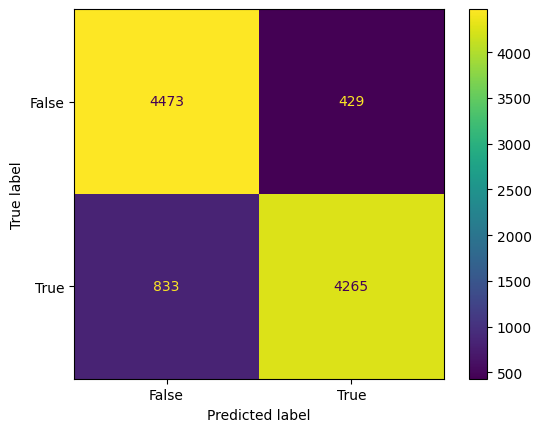

In [ ]:
from sklearn import metrics
y_pred = model.predict(X_test1)
print('Accuracy Score: ',metrics.accuracy_score(y_test, (y_pred > 0.5))*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test, (y_pred > 0.5)), sep = '\n')

print('classification_report',metrics.classification_report(y_test, (y_pred > 0.5)))

confusion_matrix = metrics.confusion_matrix(y_test, (y_pred > 0.5))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
%%shell
jupyter nbconvert --to html /content/cnn_movie_review.ipynb

[NbConvertApp] Converting notebook /content/cnn_movie_review.ipynb to html
[NbConvertApp] Writing 734662 bytes to /content/cnn_movie_review.html
